# [Chapter 5](https://pressbooks.bccampus.ca/thermo1/chapter/5-0-chapter-introduction-and-learning-objectives/)

## Question #12

$5\:g/s$ of carbon dioxide at $-20\degree C$ and $5\:bar$ enters a nozzle with inlet and outlet diameters of $40\:mm$ and $15\:mm$. Given the outlet pressure of nozzle to be $2\:bar$, calculate

a) inlet velocity of carbon dioxide

b) outlet temperature and velocity of carbon dioxide assuming ideal gas application 

c) outlet temperature and velocity of carbon dioxide using CoolProp module using the answers from b as the first guess

d) compare your answers and the validity of ideal gas assumption to question#9 of the chapter which is based on hydrogen

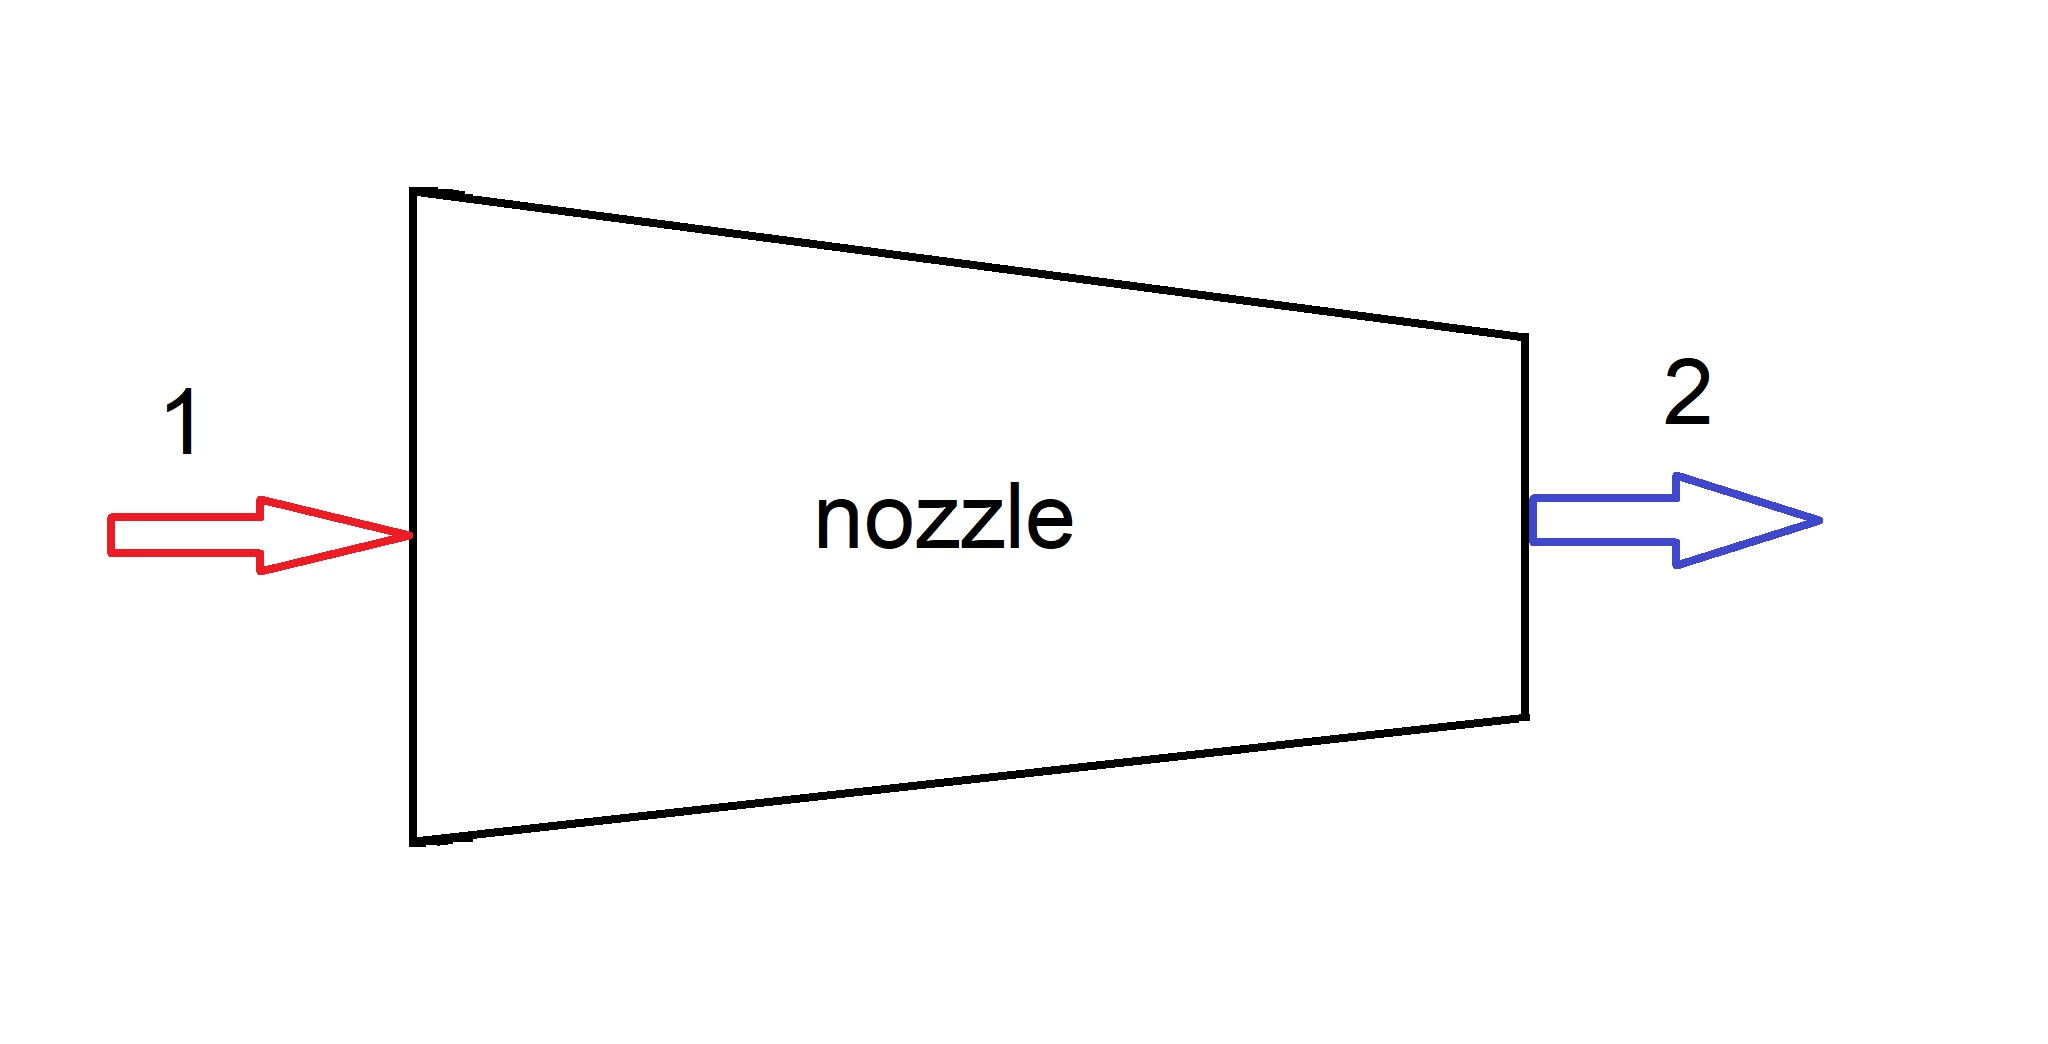

### Solution Approach for a)

from mass flow-rate correlation

$\dot m=\rho_1 A_1V_1$

so

$V_1=\dot m/(\rho_1A_1)$

In [1]:
# import the libraries we'll need
import CoolProp.CoolProp as CP
import numpy as np

# define variables
fluid = "CO2"  # define the fluid or material of interest
R = 188.9   #fluid gas constant in J/kg.K
C_p = 846   #fluid Cp in J/kg.K
T_1 = -20 + 273.15   #inlet temperature in K
P_1 = 5e+5   #inlet pressure in Pa
P_2 = 2e+5   #outlet pressure in Pa
m = 0.005   #fluid mass flow rate in kg/s
D_1 = 0.04   #inlet diameter in m
A_1 = np.pi * D_1 **2 /4   #inlet area in m2
rho_1 = CP.PropsSI("D", "T", T_1, "P", P_1, fluid)   #density of fluid at inlet in kg/m3

V_1 = m / (rho_1 * A_1)   #velocity of fluid at inlet

print('The velocity of the fluid at inlet is:', f"{V_1:.1f}", 'm/s')

The velocity of the fluid at inlet is: 0.4 m/s


### Solution Approach for b)

from mass conservation

$\dot m=\rho_2 A_2V_2$

so

$V_2=\dot m/(\rho_2A_2)$

while from ideal gas assumption

$P=\rho RT$

therefore

$\rho_2=P_2/(RT_2)$

so

$V_2=\dot m RT_2/(P_2A_2)=\alpha T_2$

while

$\alpha=\dot m R/(P_2A_2)$

from energy conservation

$h_1+1/2V_1^2=h_2+1/2V_2^2$

and from ideal gas assumption

$\Delta h=C_p(T_2-T_1)$

therefore

$C_pT_1+1/2V_1^2=C_pT_2+1/2V_2^2$

substituting $V_2$

$C_pT_1+1/2V_1^2=C_pT_2+1/2\alpha^2T_2^2$

organizing for $T_2$

$(1/2\alpha^2)T_2^2+C_pT_2-(C_pT_1+1/2V_1^2)=0$

In [2]:
# define variables
D_2 = 0.015   #outlet diameter in m
A_2 = np.pi * D_2 ** 2 /4   #outlet area in m2
alpha = m * R / (P_2 * A_2)

# Coefficients of the quadratic equation ax^2 + bx + c = 0
a = 0.5 * alpha **2
b = C_p
c = -1 * (C_p * T_1 + 0.5 * V_1 ** 2)

# Calculate the discriminant (the value inside the square root)
discriminant = b**2 - 4*a*c
# Two real solutions
x1 = (-1*b + np.sqrt(discriminant)) / (2*a)
x2 = (-1*b - np.sqrt(discriminant)) / (2*a)

# to pick the correct positive value for temperature at outlet
if x1 > 0:
   T_2 = x1
else:
   T_2 = x2

V_2 = alpha * T_2   # velocity at outlet
T_2C = T_2 - 273.15   #temperature at outlet in celcius
print('The velocity of the fluid at outlet is:', f"{V_2:.2f}", 'm/s')
print('The temperature of the fluid at outlet is:', f"{T_2C:.2f}", 'celcius')

The velocity of the fluid at outlet is: 6.76 m/s
The temperature of the fluid at outlet is: -20.03 celcius


### Solution Approach for b)

again from energy conservarion

$h_1+1/2V_1^2=h_2+1/2V_2^2$

while $h_2$ is obtained from coolprop based on pressure and temperature and

$V_2=\dot m/(\rho_2A_2)$

while $\rho_2$ is obtained from coolprop likewise, therefore

$h_2+(\dot m^2/(2A_2^2))(1/\rho_2^2)=h_1+1/2V_1^2$

setting $\beta$ as

$\beta=h_1+1/2V_1^2$

the difference between $\beta$ and the left hand side of the previous equation calculated by CoolProp would be the error of calculations used along with a tunning parameter $(z)$ in a tial-error method.

now, a trial and error method is to be used to obtain temperature (and veocity) using coolprop and the previous equation

In [3]:
h_1 = CP.PropsSI("H", "T", T_1, "P", P_1, fluid)   #enthalpy of fluid at inlet in J/kg
betha = h_1 + 0.5 * V_1 **2

#obtaining enthalpy and density based on the guess value
h_2 = CP.PropsSI("H", "T", T_2, "P", P_2, fluid)   #guess enthalpy of fluid at outlet in J/kg
rho_2 = CP.PropsSI("D", "T", T_2, "P", P_2, fluid)   #guess density of fluid at outlet in kg/m3
e = betha - h_2 - 0.5 * (m / (rho_2 * A_2)) ** 2   #error based on the guess

#now starting a loop to implement the trila and error method
i = 1
z = 0.0001    #tunning parameter to tune calculation error and apply to the new temperature guess

while np.absolute(e) > 1 :
    T_2 = T_2 + e * z    #new temperature guess based on the error (e) and the tunning parameter (z) 
    h_2 = CP.PropsSI("H", "T", T_2, "P", P_2, fluid)   #new guess enthalpy of fluid at outlet in J/kg
    rho_2 = CP.PropsSI("D", "T", T_2, "P", P_2, fluid)   #new guess density of fluid at outlet in kg/m3
    e = betha - h_2 - 0.5 * (m / (rho_2 * A_2)) ** 2   #new error based on the new guess
    i += 1
    if i == 1000:
        break

# note the difference between two consecutive temperature guesses is e * z therefore an e < 1 means a diffrence lower than 0.0001 K

V_2 = m / (rho_2 * A_2)   #velocity calculated based on temperature 
T_2C = T_2 - 273.15   #temperature at outlet in celcius

print('The velocity of the fluid at outlet based on CoolProp is:', f"{V_2:.2f}", 'm/s')
print('The temperature of the fluid at outlet based on CoolProp is:', f"{T_2C:.2f}", 'celcius')

The velocity of the fluid at outlet based on CoolProp is: 6.50 m/s
The temperature of the fluid at outlet based on CoolProp is: -25.22 celcius
